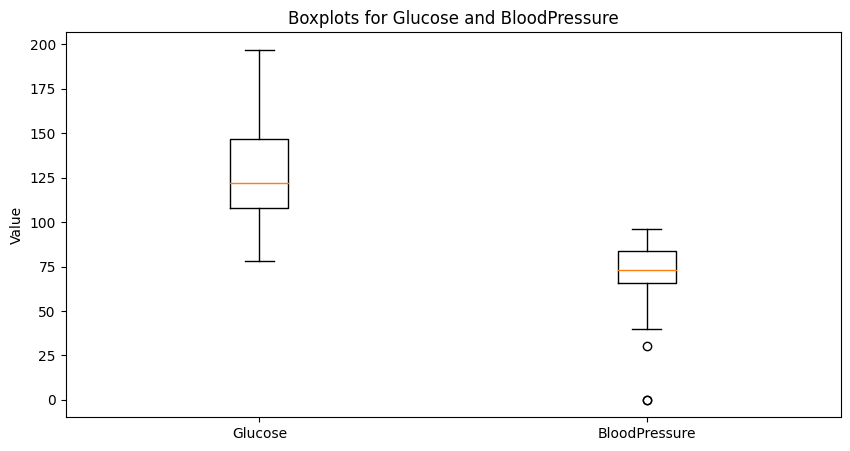

Glucose:
Mean: 130.06666666666666
Variance: 1075.0298850574711
Standard Deviation: 32.787648361196496
Z-Scores: [0.5469539363047783, -1.3745013417919332, 1.6144290908029513, -1.2525041812778563, 0.21146174489106678, -0.4290233478078371, -1.5879963726915678, -0.4595226379363563, 2.0414191526022205, -0.15452973665116398, -0.6120190885789525, 1.156939738875163, 0.27246032514810525, 1.7974248315740669, 1.0959411586181245, -0.9170119898641448, -0.3680247675507986, -0.7035169589645102, -0.8255141194785871, -0.4595226379363563, -0.12403044652264475, -0.9475112799926639, 2.0109198624737012, -0.33752547742227934, 0.39445748566218214, -0.15452973665116398, 0.5164546461762591, -1.0085098602497025, 0.4554560659192206, -0.3985240576793178]
Q1: 105.0
Median: 125.0
Q3: 146.0

BloodPressure:
Mean: 68.53333333333333
Variance: 572.119540229885
Standard Deviation: 23.91902046969911
Z-Scores: [0.14493347129571138, -0.10591292133148125, -0.18952838554054546, -0.10591292133148125, -1.1929139560493158, 0.228

In [26]:
#question 1
import pandas as pd
import matplotlib.pyplot as plt


mydata = pd.read_excel('original_diabetes.xlsx')


def calculate_mean(data):
    return sum(data) / len(data)

def calculate_variance(data):
    mean = calculate_mean(data)
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)


def calculate_std_dev(data):
    return calculate_variance(data) ** 0.5


def calculate_z_scores(data):
    mean = calculate_mean(data)
    std_dev = calculate_std_dev(data)
    return [(x - mean) / std_dev for x in data]

def calculate_quartiles(data):
    data_list = data.tolist()
    data_list.sort()
    n = len(data_list)
    median = data_list[n // 2]
    if n % 2 == 0:
        lower_half = data_list[:n // 2]
        upper_half = data_list[n // 2:]
        q1 = (lower_half[len(lower_half) // 2 - 1] + lower_half[len(lower_half) // 2]) / 2
        q3 = (upper_half[len(upper_half) // 2 - 1] + upper_half[len(upper_half) // 2]) / 2
    else:
        lower_half = data_list[:n // 2]
        upper_half = data_list[n // 2 + 1:]
        q1 = lower_half[len(lower_half) // 2]
        q3 = upper_half[len(upper_half) // 2]
    return q1, median, q3

glucose_data = mydata['Glucose'].dropna()
blood_pressure_data = mydata['BloodPressure'].dropna()


glucose_mean = calculate_mean(glucose_data)
glucose_variance = calculate_variance(glucose_data)
glucose_std_dev = calculate_std_dev(glucose_data)
glucose_z_scores = calculate_z_scores(glucose_data)
glucose_q1, glucose_median, glucose_q3 = calculate_quartiles(glucose_data)


blood_pressure_mean = calculate_mean(blood_pressure_data)
blood_pressure_variance = calculate_variance(blood_pressure_data)
blood_pressure_std_dev = calculate_std_dev(blood_pressure_data)
blood_pressure_z_scores = calculate_z_scores(blood_pressure_data)
blood_pressure_q1, blood_pressure_median, blood_pressure_q3 = calculate_quartiles(blood_pressure_data)

plt.figure(figsize=(10, 5))
plt.boxplot([glucose_data, blood_pressure_data], labels=["Glucose", "BloodPressure"])
plt.title("Boxplots for Glucose and BloodPressure")
plt.ylabel("Value")
plt.show()

print("Glucose:")
print(f"Mean: {glucose_mean}")
print(f"Variance: {glucose_variance}")
print(f"Standard Deviation: {glucose_std_dev}")
print(f"Z-Scores: {glucose_z_scores}")
print(f"Q1: {glucose_q1}")
print(f"Median: {glucose_median}")
print(f"Q3: {glucose_q3}")


print("\nBloodPressure:")
print(f"Mean: {blood_pressure_mean}")
print(f"Variance: {blood_pressure_variance}")
print(f"Standard Deviation: {blood_pressure_std_dev}")
print(f"Z-Scores: {blood_pressure_z_scores}")
print(f"Q1: {blood_pressure_q1}")
print(f"Median: {blood_presure_median}")
print(f"Q3: {blood_pressure_q3}")


In [5]:
#question 2
import numpy as np


mean_val = 10
std_val = 0.5
random_numbers = np.random.normal(mean_val, std_val, 50)

def Chebyshev_inequality(lst, k):

    mean_val = np.mean(lst)
    std_val = np.std(lst)


    lower_bound = mean_val - k * std_val
    upper_bound = mean_val + k * std_val


    total_num_data = len([x for x in lst if lower_bound <= x <= upper_bound])


    prob = total_num_data / len(lst)

    return prob


ks = [1, 2**0.5, 1.5, 2, 3]

for k in ks:
    prob = Chebyshev_inequality(random_numbers, k)
    print(f"When k = {k}, P(|X-mean_val| < {k}*std_val) = {prob}; 1 - 1/{k**2} = {1 - 1/(k**2)}")
    print(f"When k = {k}, P(|X-mean_val| < {k}*std_val) >= 1 - 1/{k**2} is {prob >= 1 - 1/(k**2)}\n")


When k = 1, P(|X-mean_val| < 1*std_val) = 0.68; 1 - 1/1 = 0.0
When k = 1, P(|X-mean_val| < 1*std_val) >= 1 - 1/1 is True

When k = 1.4142135623730951, P(|X-mean_val| < 1.4142135623730951*std_val) = 0.84; 1 - 1/2.0000000000000004 = 0.5000000000000001
When k = 1.4142135623730951, P(|X-mean_val| < 1.4142135623730951*std_val) >= 1 - 1/2.0000000000000004 is True

When k = 1.5, P(|X-mean_val| < 1.5*std_val) = 0.86; 1 - 1/2.25 = 0.5555555555555556
When k = 1.5, P(|X-mean_val| < 1.5*std_val) >= 1 - 1/2.25 is True

When k = 2, P(|X-mean_val| < 2*std_val) = 0.98; 1 - 1/4 = 0.75
When k = 2, P(|X-mean_val| < 2*std_val) >= 1 - 1/4 is True

When k = 3, P(|X-mean_val| < 3*std_val) = 1.0; 1 - 1/9 = 0.8888888888888888
When k = 3, P(|X-mean_val| < 3*std_val) >= 1 - 1/9 is True



𝑏1: 141.21212121212122
𝑏0: -466.878787878788
Coefficient of Linear Correlation (r): 0.9435795518902779


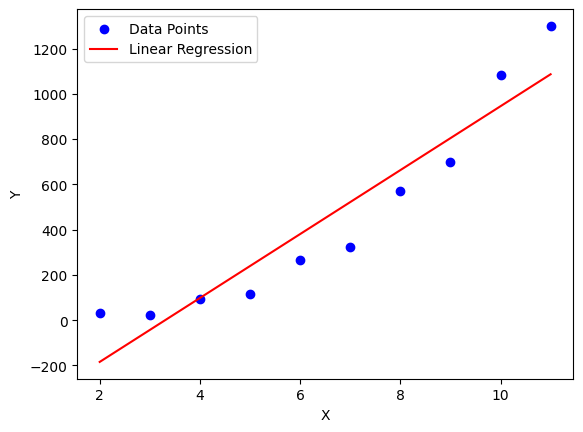

In [28]:
#question 3
import numpy as np
import matplotlib.pyplot as plt

X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
Y = np.array([30, 25, 95, 115, 265, 325, 570, 700, 1085, 1300])

n = len(X)
b1 = (n * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (n * np.sum(X**2) - (np.sum(X))**2)
b0 = (np.sum(Y) - b1 * np.sum(X)) / n


r = np.corrcoef(X, Y)[0, 1]


print(f"𝑏1: {b1}")
print(f"𝑏0: {b0}")
print(f"Coefficient of Linear Correlation (r): {r}")

regression_line = b0 + b1 * X

plt.scatter(X, Y, label='Data Points', color='b')
plt.plot(X, regression_line, label='Linear Regression', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
